In [41]:
import numpy as np
import matplotlib.pyplot as plt

smile = np.array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 5, 1, 1, 1, 1, 5, 1, 1],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [0, 0, 1, 1, 5, 5, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]])

In [7]:
smile.ndim

2

In [8]:
smile.shape

(10, 10)

In [9]:
smile.dtype

dtype('int64')

### Datatype conversion

In [11]:
smile = smile.astype(np.float32)
smile.dtype

dtype('float32')

### Initializing arrays of specified shape and value

In [14]:
np.zeros((5,5))
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

### Create arrays with ranges

In [17]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

In [18]:
np.linspace(1,10,5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

### Accessing elements

##### Indexing

In [20]:
smile[2,3]

5.0

##### Slicing

[start:stop:step]

In [23]:
smile[2:6,2:5]

array([[1., 5., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

Or combinations of both.

**Important**<br>
Indexing and slicing returns views on arrays. If needed copys explicitly need to be made!

### Change shape of arrays

In [26]:
b = np.arange(1,10)
b

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
b.reshape(3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Operations with arrays

In [45]:
smile[smile > 4]
smile > 4

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

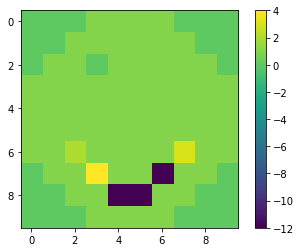

In [44]:
smile[smile > 4] = -3 *4
np.where

plt.imshow(smile)
plt.colorbar()
plt.show()

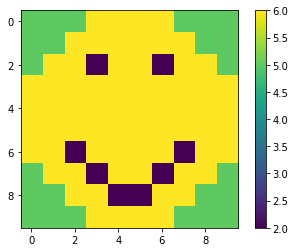

In [36]:
smile = smile + 5
plt.imshow(smile)
plt.colorbar()
plt.show()

### Aggregating

In [37]:
np.mean(smile, axis=1)

array([5.4, 5.6, 5. , 6. , 6. , 6. , 5.2, 5. , 4.8, 5.4])

In [39]:
slice(1,5)

TypeError: 'slice' object is not iterable

In [46]:
import xarray as xr

import pandas as pd
garmisch  = pd.read_csv("../data/produkt_klima_tag_20171010_20190412_01550.txt", parse_dates=["MESS_DATUM"], sep=";")
zugspitze = pd.read_csv("../data/produkt_klima_tag_20171010_20190412_05792.txt", parse_dates=["MESS_DATUM"], sep=";")

klima_tag = pd.concat([garmisch, zugspitze])
klima_tag = klima_tag.set_index(["STATIONS_ID", "MESS_DATUM"])

In [75]:
kt_ds = xr.Dataset.from_dataframe(klima_tag)
kt_ds

<xarray.Dataset>
Dimensions:      (MESS_DATUM: 550, STATIONS_ID: 2)
Coordinates:
  * STATIONS_ID  (STATIONS_ID) int64 1550 5792
  * MESS_DATUM   (MESS_DATUM) datetime64[ns] 2017-10-10 ... 2019-04-12
Data variables:
    QN_3         (STATIONS_ID, MESS_DATUM) int64 10 10 10 10 10 10 ... 1 1 1 1 1
      FX         (STATIONS_ID, MESS_DATUM) float64 5.6 -999.0 -999.0 ... 8.7 9.6
      FM         (STATIONS_ID, MESS_DATUM) float64 1.0 -999.0 -999.0 ... 3.1 2.5
    QN_4         (STATIONS_ID, MESS_DATUM) int64 3 3 3 3 3 3 3 ... 1 1 1 1 1 1 1
     RSK         (STATIONS_ID, MESS_DATUM) float64 0.0 0.0 0.0 ... 10.1 1.6 0.0
    RSKF         (STATIONS_ID, MESS_DATUM) int64 6 0 0 0 0 0 0 ... 0 7 7 7 7 7 7
     SDK         (STATIONS_ID, MESS_DATUM) float64 2.3 9.533 9.483 ... 0.0 8.833
    SHK_TAG      (STATIONS_ID, MESS_DATUM) int64 0 0 0 0 0 ... 430 435 430 430
      NM         (STATIONS_ID, MESS_DATUM) float64 7.5 2.6 1.9 ... 7.9 8.0 6.3
     VPM         (STATIONS_ID, MESS_DATUM) float64 9.4 9.1 9.

In [77]:
kt_ds = kt_ds[[" TNK", " TXK"]].sel(MESS_DATUM=slice("2018-01", "2018-02"))
kt_ds

<xarray.Dataset>
Dimensions:      (MESS_DATUM: 59, STATIONS_ID: 2)
Coordinates:
  * STATIONS_ID  (STATIONS_ID) int64 1550 5792
  * MESS_DATUM   (MESS_DATUM) datetime64[ns] 2018-01-01 ... 2018-02-28
Data variables:
     TNK         (STATIONS_ID, MESS_DATUM) float64 -3.8 -1.8 0.0 ... -28.9 -25.1
     TXK         (STATIONS_ID, MESS_DATUM) float64 4.4 4.6 5.9 ... -24.0 -11.5